In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
!python --version

Python 3.7.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# covid = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
# covid = covid[covid['date'] == '2020-06-30']
# covid = covid.drop(['date', 'county', 'state'], axis = 1)
# covid = covid.dropna()
# covid['fips'] = covid['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# covid['fips'].nunique()

In [ ]:
data = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/whole_data.csv')

# data = data[['fips', 'popdense', 'population', 'ageab55', 'ageab65', 'ageab75', 'pctpov', 'pctmale', 'pctblack', 'pcthispanic', 'type', 'pct_highschool_or_less', 'no2', 'ozone', 'pm25', 'so2']]
# data['fips'] = data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

# data = data.merge(covid, on='fips')
# data['cases rate 10k'] = data['cases'] / data['population'] * 10000
# data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
# data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000

# data[data['type'] == 0].to_csv('ZoneA_wave1.csv')
# data[data['type'] == 1].to_csv('ZoneB_wave1.csv')
cdata = data
# data.head()

cdata['ageab65'] = cdata['ageab65'] * 100
cdata['type'].value_counts()

1    73
0    45
Name: type, dtype: int64

### Viz

#### Correlation

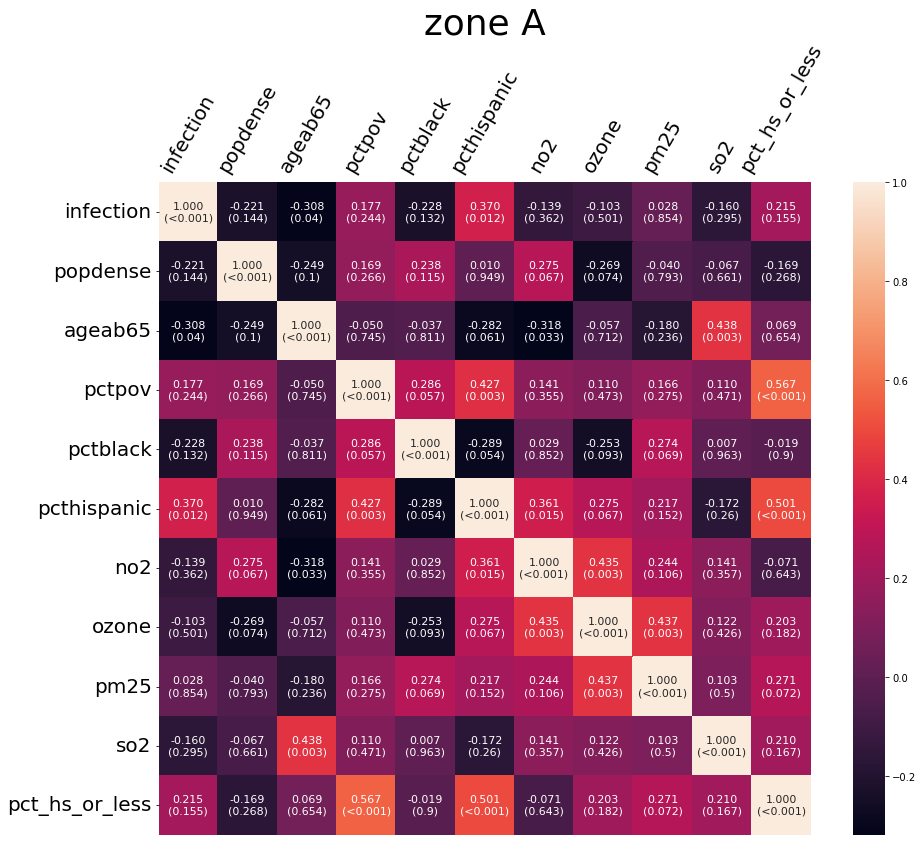

In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneA_wave1.svg", format="svg")
plt.savefig("corr_infection_zoneA_wave1.png")
# files.download("corr1.svg")
plt.show()

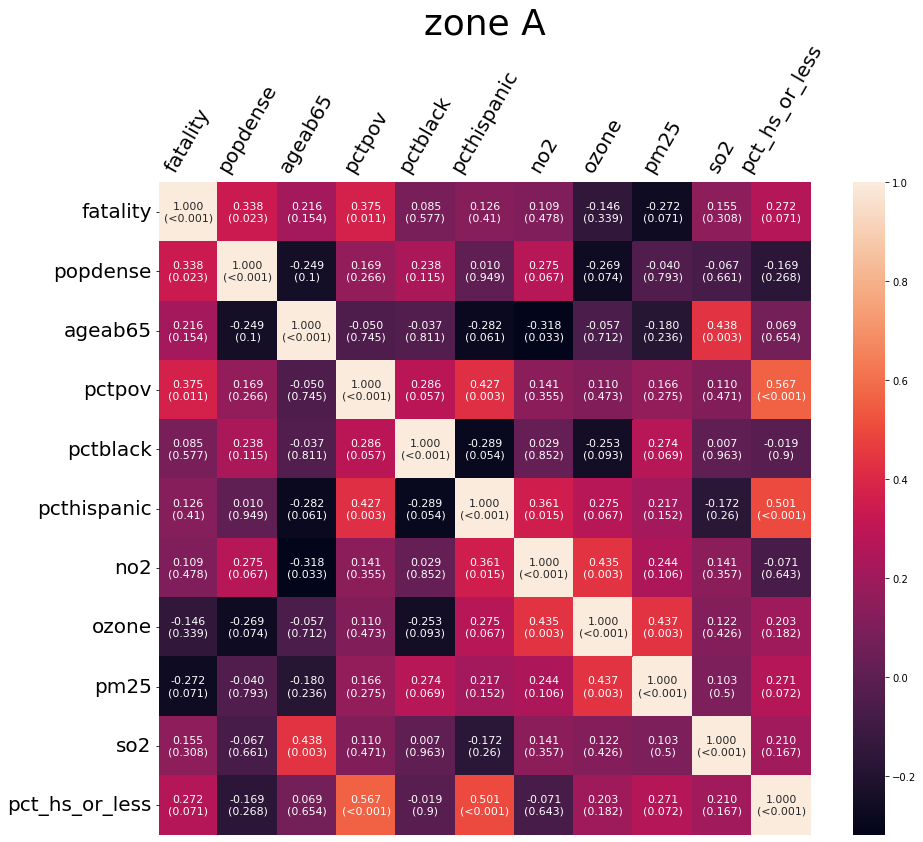

In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneA_wave1.svg", format="svg")
plt.savefig("corr_fatality_zoneA_wave1.png")
# files.download("corr1.svg")
plt.show()

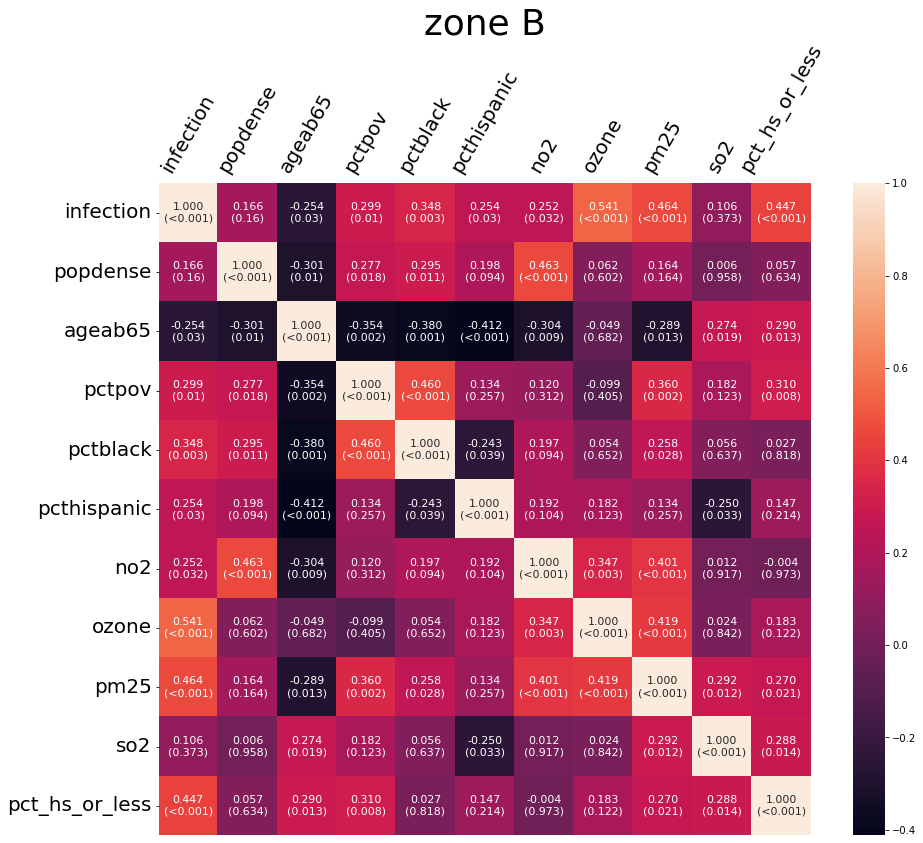

In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneB_wave1.svg", format="svg")
plt.savefig("corr_infection_zoneB_wave1.png")
# files.download("corr1.svg")
plt.show()

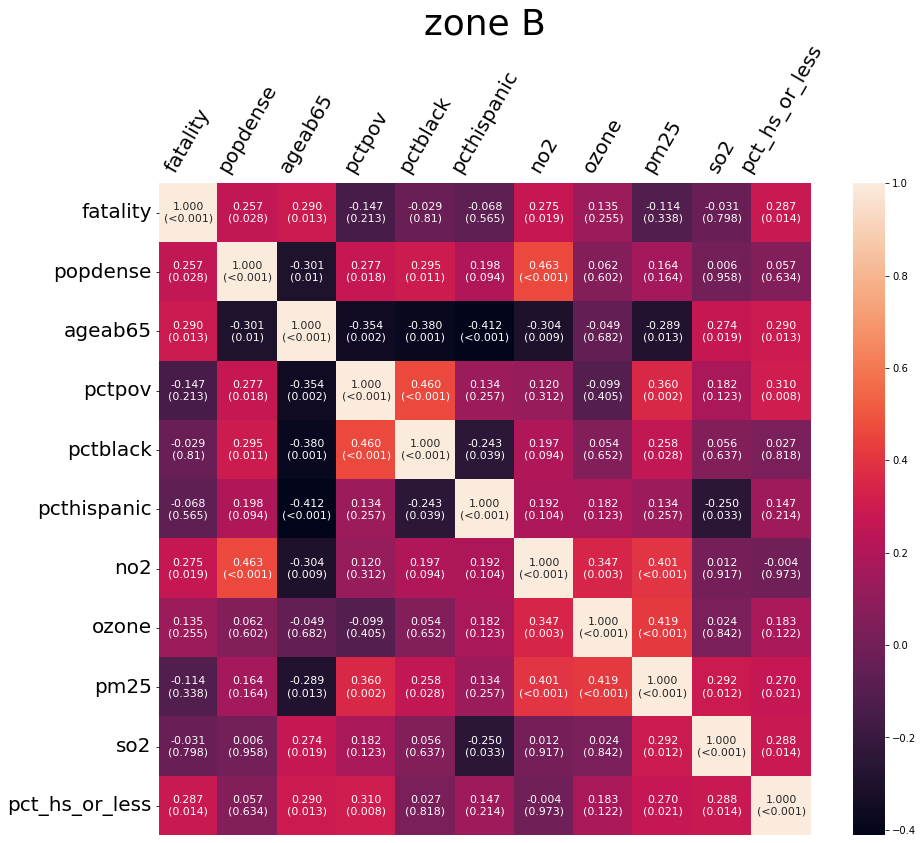

In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneB_wave1.svg", format="svg")
plt.savefig("corr_fatality_zoneB_wave1.png")
# files.download("corr1.svg")
plt.show()

#### Boxplot

popdense popdense Ttest_indResult(statistic=-0.8835269739647754, pvalue=0.3787790728883018)
popdense popdensemean Zone A 560.9465847577777,mean Zone B 718.3347848356163
popdense popdensestd Zone A 868.498069959725,std Zone B 980.9706764206971
ageab65 ageab65 Ttest_indResult(statistic=-1.9926296431837027, pvalue=0.048650095097622664)
ageab65 ageab65mean Zone A 14.484254843008724,mean Zone B 15.489408862523243
ageab65 ageab65std Zone A 2.460678044364446,std Zone B 2.7771436900709556
pctpov pctpov Ttest_indResult(statistic=1.9760054918203493, pvalue=0.05052802621307989)
pctpov pctpovmean Zone A 15.208888888888886,mean Zone B 13.578082191780824
pctpov pctpovstd Zone A 3.809308110776586,std Zone B 4.6563948433949545
pctblack pctblack Ttest_indResult(statistic=-1.278399697456455, pvalue=0.20366049349070411)
pctblack pctblackmean Zone A 14.251698132444444,mean Zone B 17.89610001191781
pctblack pctblackstd Zone A 11.702820281910013,std Zone B 16.757240578380323
pcthispanic pcthispanic Ttest_in

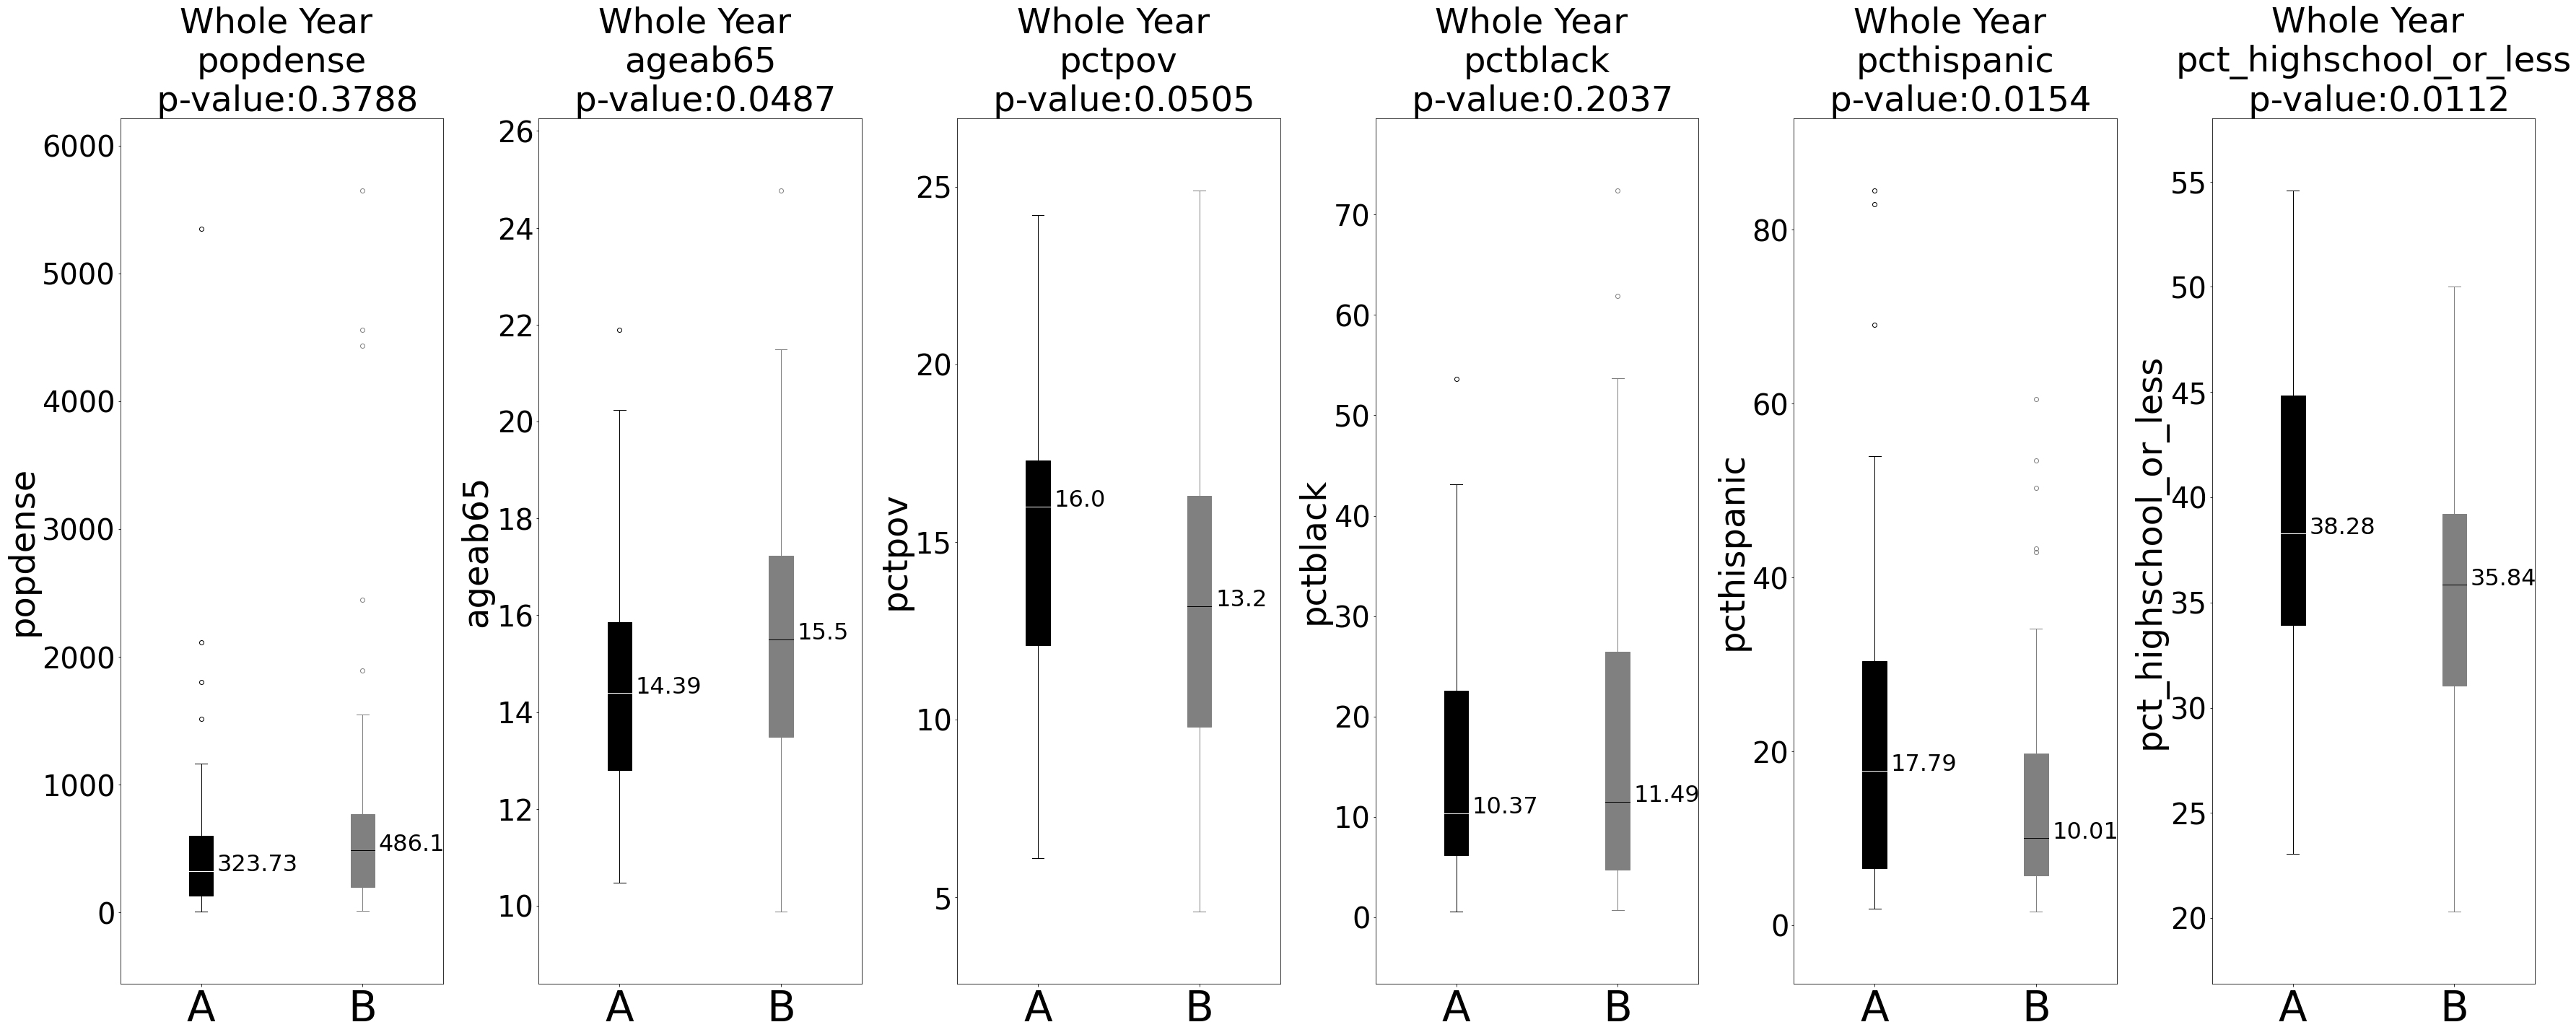

In [ ]:
stats_result = pd.DataFrame(columns=['Name', 'T-test Statistics', 'T-Test p-value', 'Mann-Whitney U test Statistics', 'Mann-Whitney U test p-value'])

rdata = cdata.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Whole Year \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("demo_allwave.svg", format="svg")

no2 no2 Ttest_indResult(statistic=2.6283611884073537, pvalue=0.009740927013339708)
no2 no2mean Zone A 21.349529752191078,mean Zone B 18.011408942590958
no2 no2std Zone A 7.257009631751735,std Zone B 6.3373538079825265
ozone ozone Ttest_indResult(statistic=1.2889147954818165, pvalue=0.19999220561898157)
ozone ozonemean Zone A 0.04733465900629235,mean Zone B 0.046244154679948225
ozone ozonestd Zone A 0.004888772790107554,std Zone B 0.004183337386105949
pm25 pm25 Ttest_indResult(statistic=0.7023548756971375, pvalue=0.48386487233087416)
pm25 pm25mean Zone A 8.088950004195606,mean Zone B 7.881632591028638
pm25 pm25std Zone A 1.536161929672898,std Zone B 1.570270037057686
so2 so2 Ttest_indResult(statistic=0.7453843275113397, pvalue=0.45754708140365974)
so2 so2mean Zone A 1.867091755621601,mean Zone B 1.6025728854372905
so2 so2std Zone A 2.6816626573620104,std Zone B 1.119727031875408


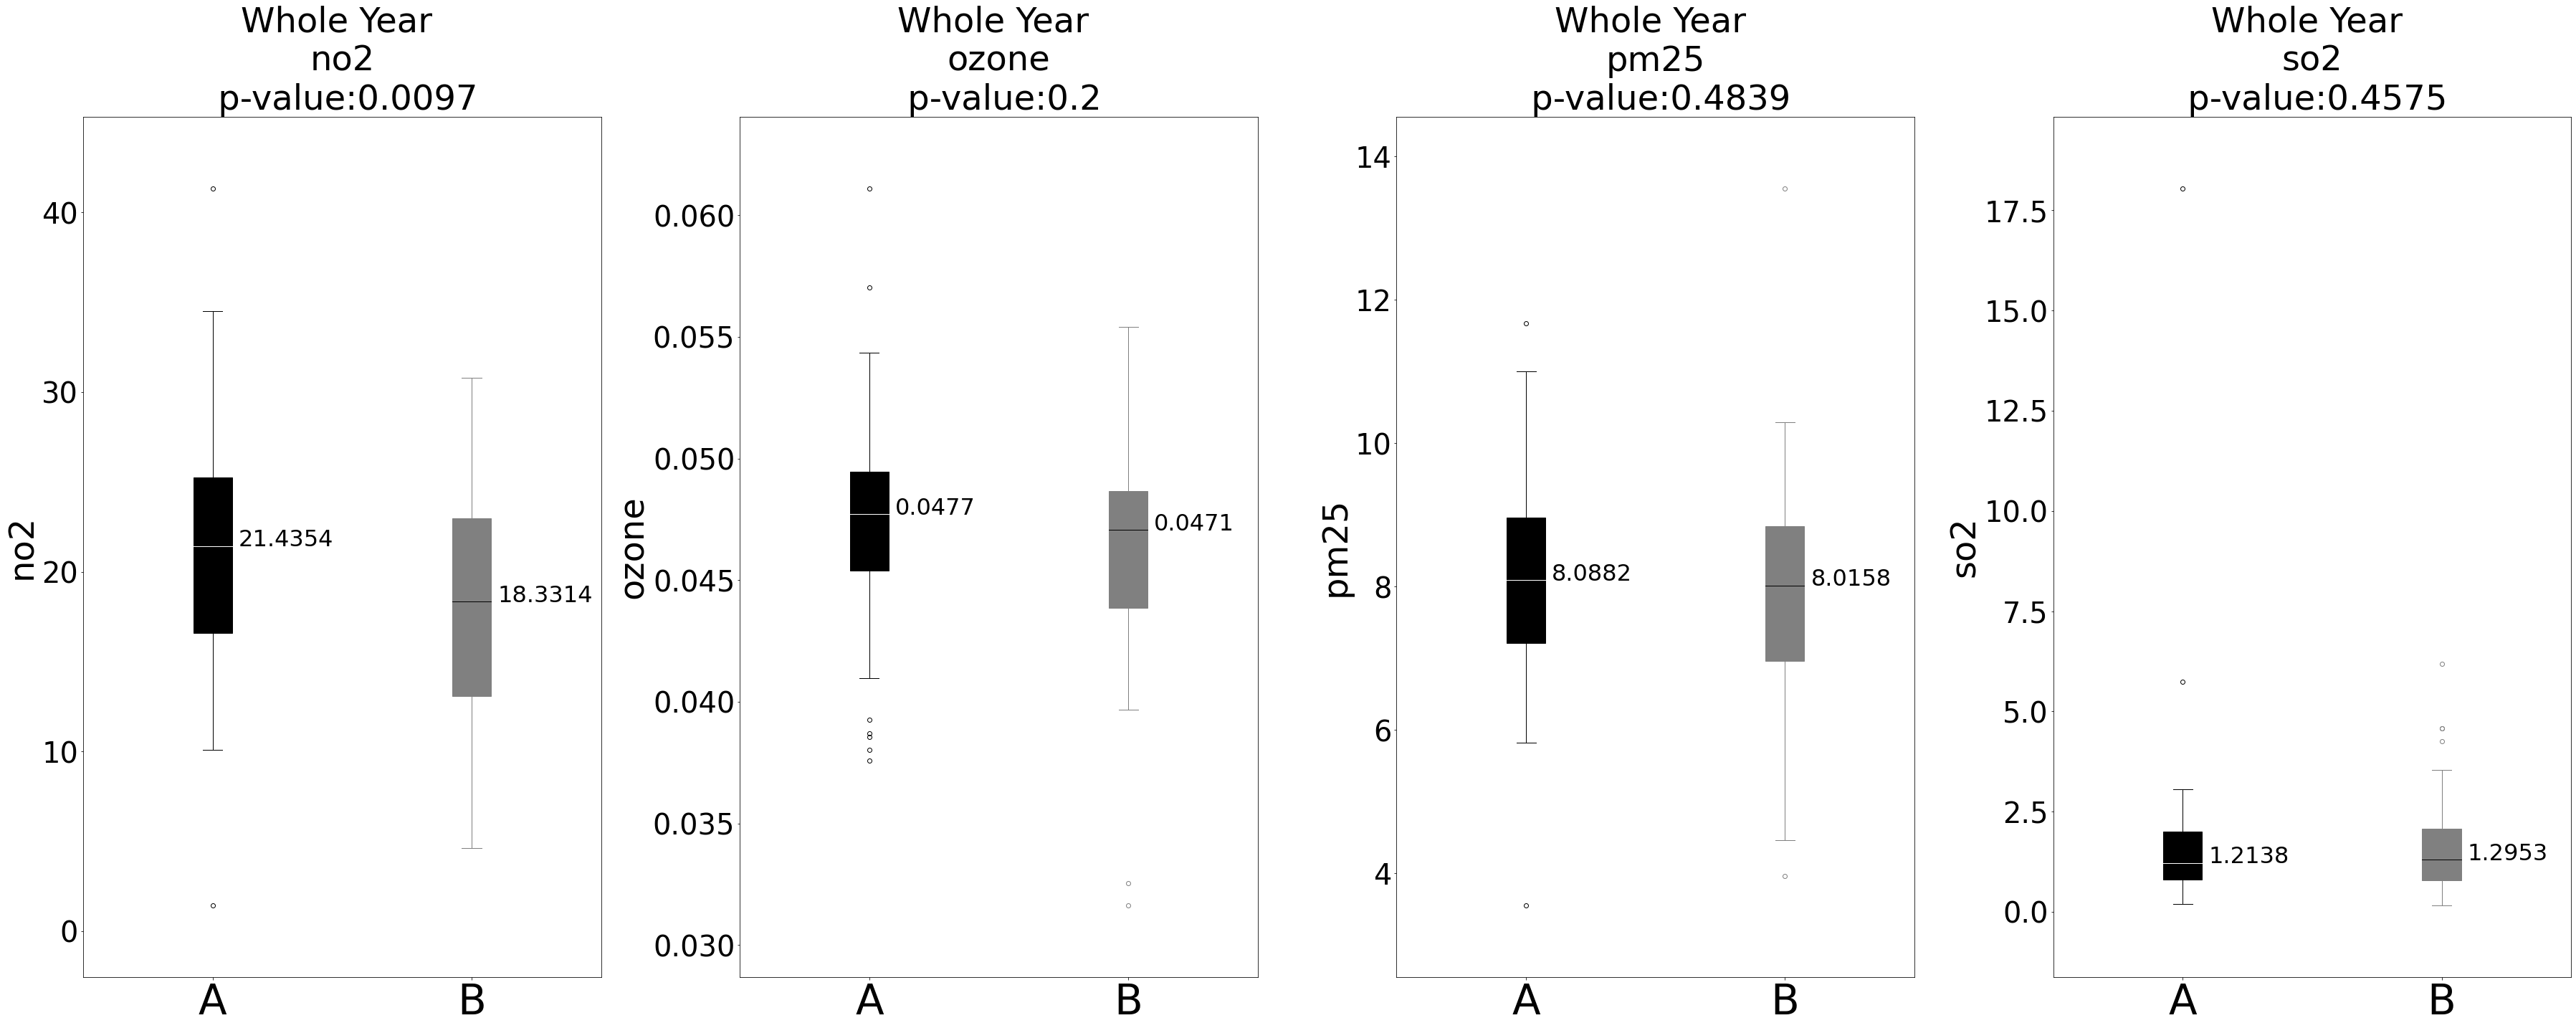

In [ ]:
rdata = cdata.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Whole Year \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("pollutant_allwave.svg", format="svg")

In [ ]:
stats_result.to_csv('t-test_allyear.csv')

### MLR Infection

In [ ]:
rdata = cdata.copy()

In [ ]:
rdata.columns

Index(['Unnamed: 0', 'fips', 'cases', 'deaths', 'popdense', 'population',
       'ageab55', 'ageab65', 'AR', 'AS', 'AT', 'AU', 'pct_highschool_or_less',
       'cases rate 10k', 'deaths rate 10k', 'deaths cases 10k', 'pctpov',
       'pctmale', 'pctwhite', 'pctblack', 'pctindian', 'pctasian',
       'pcthispanic', 'type', 'ozone', 'pm25', 'no2', 'so2'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
rdata['cases rate 10k'] = np.log(rdata['cases rate 10k'])
rdata['deaths cases 10k'] = np.log(rdata['deaths cases 10k'])

#### Zone A All

In [ ]:
A = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone A")
calc_vif(A)

Zone A


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,229.504554
1,popdense,1.509790
2,ageab65,1.637661
3,pctpov,2.278399
4,pctblack,2.363695
5,pcthispanic,3.197639
6,no2,2.634358
7,ozone,2.383790
8,pm25,1.905298
9,so2,1.887104


In [ ]:
import statsmodels.api as sm

X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['cases rate 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-12_infect_zoneA_all_MLR.csv')

                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.749
Date:                Sun, 20 Mar 2022   Prob (F-statistic):             0.0135
Time:                        00:00:00   Log-Likelihood:                 30.275
No. Observations:                  45   AIC:                            -38.55
Df Residuals:                      34   BIC:                            -18.68
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['deaths cases 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-12_fatal_zoneA_all_MLR.csv')

                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     3.138
Date:                Sun, 20 Mar 2022   Prob (F-statistic):            0.00608
Time:                        00:00:00   Log-Likelihood:                -2.0130
No. Observations:                  45   AIC:                             26.03
Df Residuals:                      34   BIC:                             45.90
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Zone B All

In [ ]:
A = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone A")
calc_vif(A)

Zone A


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,229.887907
1,popdense,1.473158
2,ageab65,2.832609
3,pctpov,1.955999
4,pctblack,2.061714
5,pcthispanic,2.143841
6,no2,1.637675
7,ozone,1.524100
8,pm25,1.955197
9,so2,1.425932


In [ ]:
import statsmodels.api as sm

X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1][['cases rate 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-12_infect_zoneB_all_MLR.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     9.155
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           4.45e-09
Time:                        00:00:00   Log-Likelihood:                 7.6998
No. Observations:                  73   AIC:                             6.600
Df Residuals:                      62   BIC:                             31.80
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [ ]:
X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1][['deaths cases 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-12_fatal_zoneB_all_MLR.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     4.689
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           5.59e-05
Time:                        00:00:00   Log-Likelihood:                -29.226
No. Observations:                  73   AIC:                             80.45
Df Residuals:                      62   BIC:                             105.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3